In [18]:
from PIL import Image
from pipeline import pipeline, segmentation_filter
from utils import segmentation_labels, utils
from models import dataset, config
from sklearn.model_selection import train_test_split
import random
import torchvision.transforms as T
import matplotlib.pyplot as plt
from palette_classification import color_processing

In [19]:
# fetch test dataset
n_classes = len(segmentation_labels.labels)
dataset_path = config.DATASET_PATH
img_paths, label_paths = dataset.get_paths(dataset_path, file_name=config.DATASET_INDEX_NAME)
_, X_test, _, Y_test = train_test_split(img_paths, label_paths, test_size=0.20, random_state=99, shuffle=True)

# define filters
segmentation_filter = segmentation_filter.SegmentationFilter('local')

# compose pipeline
pipeline = pipeline.Pipeline()
pipeline.add_filter(segmentation_filter)

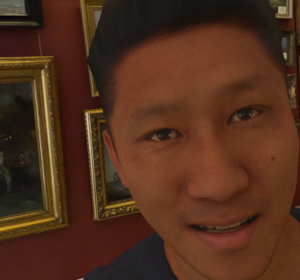

In [36]:
# take random image from test dataset
i = random.randint(0, len(X_test) - 1)
input = Image.open(X_test[i]).convert('RGB')
input

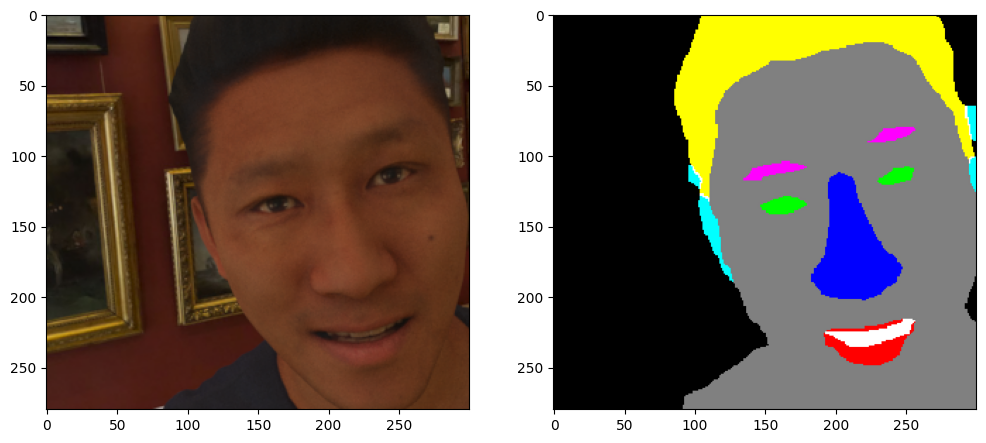

In [37]:
# show results   
img, masks = pipeline.execute(input)
img = img.to('cpu')
masks = masks.to('cpu')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(utils.from_DHW_to_HWD(img))
plt.subplot(1, 2, 2)
plt.imshow(utils.from_DHW_to_HWD(color_processing.colorize_segmentation_masks(masks, segmentation_labels.labels)))